In [8]:
from pyprojroot.here import here
import pandas as pd
data = pd.read_excel(here("data/por-municipios.xlsx"))
data

,Year,Month,Date,District,Municipality,parish,Voltage level,Active Energy (kWh),DistrictCode,DistrictMunicipalityCode,DistrictMunicipalityParishCode
,<int64>,<int64>,<object>,<object>,<object>,<object>,<object>,<float64>,<int64>,<int64>,<object>
0,2023,5,2023-05,SANTAREM,Rio Maior,UF AZAMBUJEIRA E MALAQUEIJO,"Muito Alta, Alta e Média Tensões",42889.398,14,1414,141415
1,2023,5,2023-05,SETUBAL,Sesimbra,SESIMBRA (SANTIAGO),"Muito Alta, Alta e Média Tensões",501913.130,15,1511,151102
2,2023,5,2023-05,VILA REAL,Murça,JOU,Baixa Tensão,70955.155,17,1707,170704
3,2023,5,2023-05,VILA REAL,Santa Marta de Penaguião,SEVER,"Muito Alta, Alta e Média Tensões",52292.716,17,1711,171110
...,...,...,...,...,...,...,...,...,...,...,...
4,2023,5,2023-05,VISEU,Armamar,SAO MARTINHO DAS CHAS,Baixa Tensão,95161.235,18,1801,180115
165019,2022,7,2022-07,BRAGANCA,Vinhais,VINHAIS,"Muito Alta, Alta e Média Tensões",63732.258,4,412,041235
165020,2022,7,2022-07,COIMBRA,Figueira da Foz,MARINHA DAS ONDAS,Baixa Tensão,434881.302,6,605,060508
165021,2022,7,2022-07,FARO,Alcoutim,MARTIM LONGO,Baixa Tensão,162904.786,8,802,080203


In [9]:
data.isnull().sum()

Year                                0
Month                               0
Date                                0
District                            0
Municipality                        0
parish                              0
Voltage level                       0
Active Energy (kWh)                 0
DistrictCode                        0
DistrictMunicipalityCode            0
DistrictMunicipalityParishCode    562
dtype: int64

In [18]:
from datar import f
from datar.dplyr import select, mutate, filter_, relocate
from datar.base import as_character as as_str

dataWI = (
    data >>
    select(
      data = f.Date, distrito = f.District, concelho = f.Municipality,
      nivel_voltagem = f["Voltage level"], energia_ativa_kWh = f["Active Energy (kWh)"], 
      ano = f.Year, mes = f.Month, freguesia_acho = f.parish # reductant but can be useful
    )
)
dataWI

,data,distrito,concelho,nivel_voltagem,energia_ativa_kWh,ano,mes,freguesia_acho
,<object>,<object>,<object>,<object>,<float64>,<int64>,<int64>,<object>
0,2023-05,SANTAREM,Rio Maior,"Muito Alta, Alta e Média Tensões",42889.398,2023,5,UF AZAMBUJEIRA E MALAQUEIJO
1,2023-05,SETUBAL,Sesimbra,"Muito Alta, Alta e Média Tensões",501913.130,2023,5,SESIMBRA (SANTIAGO)
2,2023-05,VILA REAL,Murça,Baixa Tensão,70955.155,2023,5,JOU
3,2023-05,VILA REAL,Santa Marta de Penaguião,"Muito Alta, Alta e Média Tensões",52292.716,2023,5,SEVER
...,...,...,...,...,...,...,...,...
4,2023-05,VISEU,Armamar,Baixa Tensão,95161.235,2023,5,SAO MARTINHO DAS CHAS
165019,2022-07,BRAGANCA,Vinhais,"Muito Alta, Alta e Média Tensões",63732.258,2022,7,VINHAIS
165020,2022-07,COIMBRA,Figueira da Foz,Baixa Tensão,434881.302,2022,7,MARINHA DAS ONDAS
165021,2022-07,FARO,Alcoutim,Baixa Tensão,162904.786,2022,7,MARTIM LONGO


In [4]:
# base map
import folium
import folium.plugins as plugins

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=4)
m

,distrito,concelho,geometry
,<object>,<object>,<geometry>
0,Évora,Évora,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,Évora,Alandroal,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,Évora,Arraiolos,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,Évora,Borba,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
...,...,...,...
4,Évora,Estremoz,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."
303,Viseu,Tarouca,"POLYGON ((-7.72591 41.08079, -7.72442 41.08028..."
304,Viseu,Tondela,"POLYGON ((-8.12772 40.64028, -8.12751 40.64027..."
305,Viseu,Vila Nova de Paiva,"POLYGON ((-7.77933 40.93439, -7.77835 40.93436..."


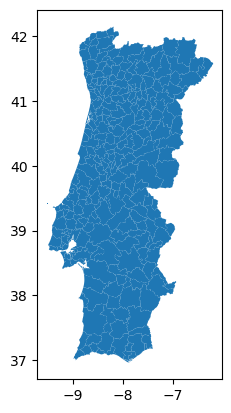

In [19]:
import geopandas as gpd
from datar.dplyr import distinct
from datar.base import nrow, is_in

geo_data = gpd.read_file(here("shape/concelhos.shp"))
geo_data = (geo_data >>
            filter_(~is_in(f.NAME_1, ["Azores", "Madeira"])) >>
            # filter_((f.NAME_1 != "Azores") & (f.NAME_1 != "Madeira")) >>
            select(distrito = f.NAME_1, concelho = f.NAME_2, geometry = f.geometry)
            )
geo_data = gpd.GeoDataFrame(geo_data)
geo_data.plot()
geo_data

In [23]:
merged = pd.merge(geo_data, dataWI, on=["concelho"], how="left").drop(columns=["distrito_y"]).rename(columns={"distrito_x": "distrito"})
merged_only_1_date = merged >> filter_(f.data == "2021-05")
merged_only_1_date >> relocate(f.distrito, f.concelho, f.freguesia_acho, f.data, f.energia_ativa_kWh)

,distrito,concelho,freguesia_acho,data,energia_ativa_kWh,geometry,nivel_voltagem,ano,mes
,<object>,<object>,<object>,<object>,<float64>,<geometry>,<object>,<float64>,<float64>
0,Évora,Évora,UF S MANCOS S VICENTE PIGEIRO,2021-05,820523.180,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...","Muito Alta, Alta e Média Tensões",2021.0,5.0
12,Évora,Évora,NOSSA SENHORA DE MACHEDE,2021-05,578032.396,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...","Muito Alta, Alta e Média Tensões",2021.0,5.0
132,Évora,Évora,TORRE DE COELHEIROS,2021-05,106742.679,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...",Baixa Tensão,2021.0,5.0
240,Évora,Évora,UF SEBASTIAO GIESTEIRA BOA FE,2021-05,4298.641,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...","Muito Alta, Alta e Média Tensões",2021.0,5.0
...,...,...,...,...,...,...,...,...,...
262,Évora,Évora,UF BACELO E SENHORA DA SAUDE,2021-05,2314332.884,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...",Baixa Tensão,2021.0,5.0
162042,Viseu,Vouzela,UF FATAUNCOS FIGUEIREDO DONAS,2021-05,29742.694,"POLYGON ((-8.04644 40.74920, -8.04635 40.74897...","Muito Alta, Alta e Média Tensões",2021.0,5.0
162069,Viseu,Vouzela,ALCOFRA,2021-05,109622.179,"POLYGON ((-8.04644 40.74920, -8.04635 40.74897...",Baixa Tensão,2021.0,5.0
162071,Viseu,Vouzela,CAMPIA,2021-05,299730.919,"POLYGON ((-8.04644 40.74920, -8.04635 40.74897...",Baixa Tensão,2021.0,5.0


In [7]:
folium.Choropleth(
  geo_data=merged,
  columns=["concelho", "energia_ativa_kWh"],
  key_on="feature.properties.concelho",
  fill_color="YlGnBu",
).add_to(m)
m

KeyboardInterrupt: 